In [1]:
import numpy as np
from scipy.stats import chi2

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Просто некоторые настройки для графиков
plt.rcParams["figure.figsize"] = (15, 11)
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.35, rc={"lines.linewidth": 3.5})

# А тут некоторые настройки для вывода массивов
np.set_printoptions(precision=2)

---
# 1)

In [3]:
a = 113
b = 2
m = 10000


def get_sequence(n=100):
    z = [2456]

    for i in range(n - 1):
        z.append((a * z[i] + b) % m)

    return np.array(z)

In [4]:
z100 = get_sequence(100)
z100

array([2456, 7530,  892,  798,  176, 9890, 7572, 5638, 7096, 1850, 9052,
       2878, 5216, 9410, 3332, 6518, 6536, 8570, 8412,  558, 3056, 5330,
       2292, 8998, 6776, 5690, 2972, 5838, 9696, 5650, 8452, 5078, 3816,
       1210, 6732,  718, 1136, 8370, 5812, 6758, 3656, 3130, 3692, 7198,
       3376, 1490, 8372, 6038, 2296, 9450, 7852, 7278, 2416, 3010,  132,
       4918, 5736, 8170, 3212, 2958, 4256,  930, 5092, 5398, 9976, 7290,
       3772, 6238, 4896, 3250, 7252, 9478, 1016, 4810, 3532, 9118,  336,
       7970,  612, 9158, 4856, 8730, 6492, 3598, 6576, 3090, 9172, 6438,
       7496, 7050, 6652, 1678, 9616, 6610, 6932, 3318, 4936, 7770, 8012,
       5358])

---
# 2)

In [5]:
print('Values:\t', z100[:10], sep='\t')
print('Probabilities:', z100[:10] / m, sep='\t')

Values:		[2456 7530  892  798  176 9890 7572 5638 7096 1850]
Probabilities:	[0.25 0.75 0.09 0.08 0.02 0.99 0.76 0.56 0.71 0.18]


In [6]:
z100 = z100 / m

---
# 3)

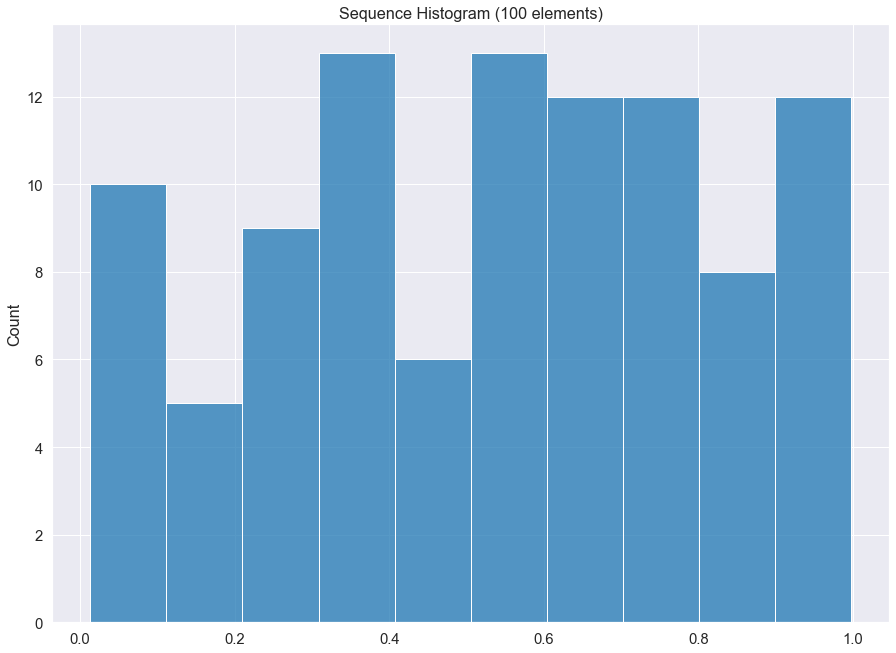

In [7]:
sns.histplot(data=z100, bins=10, kde=False)

plt.title("Sequence Histogram (100 elements)")
plt.show()

---
# 4)

$H_0$: Последовательность $\sim R(0, 1)$.

**Центральная статистика:**
$$\chi^2 = \sum_{j = 1}^k \frac{\left( O_j - E_j \right)^2}{E_j} \sim \chi_{k - 1}^2$$

$O_j$ — наблюдаемые частоты, $E_j$ — ожидаемые частоты.

Отвергаем $H_0$, если $\chi^2 > \chi_{k - 1, \alpha}^2$, где $\alpha$ — уровень значимости.

In [8]:
def get_observed_values(z, indexes=10):
    observed = []

    for i in range(0, indexes):
        observed.append(np.logical_and(z >= i / 10, z < (i + 1) / 10).sum())

    return np.array(observed)


def get_expected_values(n=100, indexes=10):
    return np.full(indexes, n / indexes)


def count_central_statistics(observed, expected):
    result = 0

    for i in range(len(observed)):
        result += (observed[i] - expected[i])**2 / expected[i]

    return result


def check_hypothesis(observed, expected, alpha=0.05):
    central_statistics = count_central_statistics(observed, expected)
    critical_value = chi2.ppf(1 - alpha, len(observed) - 1)

    return central_statistics - critical_value

In [9]:
observed = get_observed_values(z100)
expected = get_expected_values(100)

print('Observed:', observed, sep='\t')
print('Expected:', expected, sep='\t')

Observed:	[ 9  6  7 15  6 12 13 12  9 11]
Expected:	[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


In [10]:
check_hypothesis(observed, expected)

-8.318977604620448

**Вывод:** Гипотеза подтверждается. Распределение похоже на равномерное на уровне значимости 5%.

---
# 5)

In [11]:
z10000 = get_sequence(10000) / m
z10000

array([0.25, 0.75, 0.09, ..., 0.88, 0.1 , 0.44])

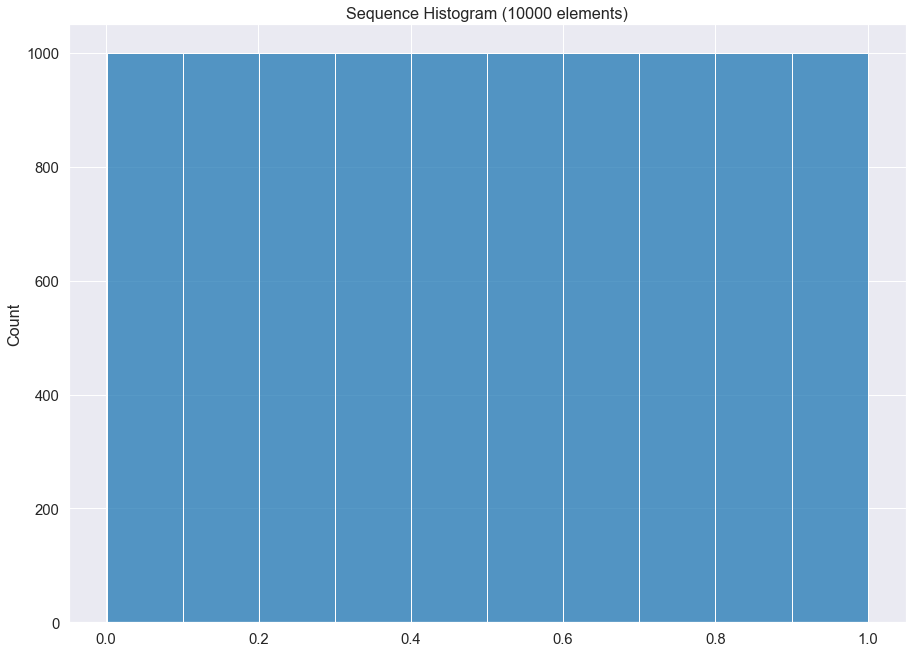

In [12]:
sns.histplot(data=z10000, bins=10, kde=False)

plt.title("Sequence Histogram (10000 elements)")
plt.show()

In [13]:
observed = get_observed_values(z10000)
expected = get_expected_values(10000)

print('Observed:', observed, sep='\t')
print('Expected:', expected, sep='\t')

Observed:	[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]
Expected:	[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]


In [14]:
check_hypothesis(observed, expected)

-16.918977604620448

**Вывод:** Гипотеза подтверждается. Распределение похоже на равномерное на уровне значимости 5%.

---
# 6)

In [15]:
z3 = z10000[:9999].reshape(-1, 3)
z3

array([[0.25, 0.75, 0.09],
       [0.08, 0.02, 0.99],
       [0.76, 0.56, 0.71],
       ...,
       [0.97, 0.07, 0.66],
       [0.76, 0.99, 0.23],
       [0.19, 0.88, 0.1 ]])

In [16]:
ranks = z3.argsort().argsort()
len(ranks), ranks

(3333,
 array([[1, 2, 0],
        [1, 0, 2],
        [2, 0, 1],
        ...,
        [2, 0, 1],
        [1, 2, 0],
        [1, 2, 0]]))

In [17]:
values, counts = np.unique(ranks, axis=0, return_counts=True)
values, counts

(array([[0, 1, 2],
        [0, 2, 1],
        [1, 0, 2],
        [1, 2, 0],
        [2, 0, 1],
        [2, 1, 0]]),
 array([570, 564, 533, 548, 549, 569]))

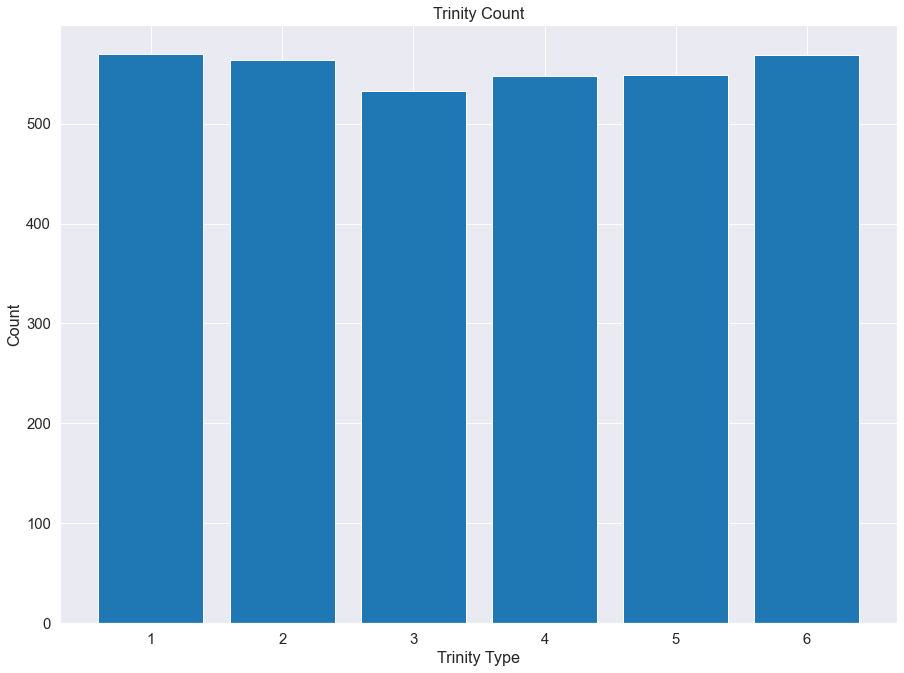

In [18]:
plt.bar(np.arange(1, 7), counts)

plt.title("Trinity Count")
plt.xlabel("Trinity Type")
plt.ylabel("Count")
plt.show()

In [19]:
expected = get_expected_values(3333, 6)

print('Observed:', counts, sep='\t')
print('Expected:', expected, sep='\t')

Observed:	[570 564 533 548 549 569]
Expected:	[555.5 555.5 555.5 555.5 555.5 555.5]


In [20]:
check_hypothesis(counts, expected)

-9.145205164263427

**Вывод:** Последовательность прошла тест перестановок на уровне значимости 5%.